In [2]:
import scipy, pylab
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.hanning(framesamp)
    X = scipy.array([scipy.fft(w*x[i:i+framesamp]) 
                     for i in range(0, len(x)-framesamp, hopsamp)])
    return X

def istft(X, fs, T, hop):
    x = scipy.zeros(T*fs)
    framesamp = X.shape[1]
    hopsamp = int(hop*fs)
    for n,i in enumerate(range(0, len(x)-framesamp, hopsamp)):
        x[i:i+framesamp] += scipy.real(scipy.ifft(X[n]))
    return x

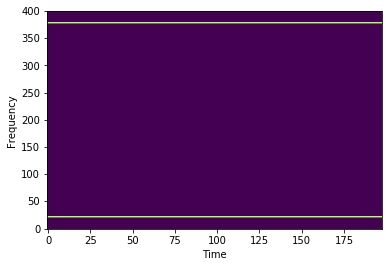

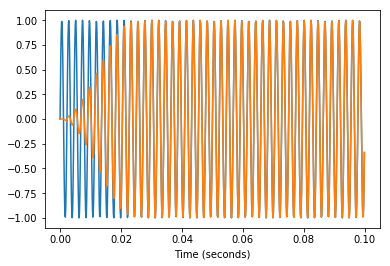

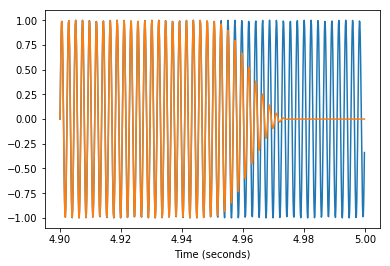

In [4]:
if __name__ == '__main__':
    f0 = 440         # Compute the STFT of a 440 Hz sinusoid
    fs = 8000        # sampled at 8 kHz
    T = 5            # lasting 5 seconds
    framesz = 0.050  # with a frame size of 50 milliseconds
    hop = 0.025      # and hop size of 25 milliseconds.

    # Create test signal and STFT.
    t = scipy.linspace(0, T, T*fs, endpoint=False)
    x = scipy.sin(2*scipy.pi*f0*t)
    X = stft(x, fs, framesz, hop)

    # Plot the magnitude spectrogram.
    pylab.figure()
    pylab.imshow(scipy.absolute(X.T), origin='lower', aspect='auto',
                 interpolation='nearest')
    pylab.xlabel('Time')
    pylab.ylabel('Frequency')
    pylab.show()

    # Compute the ISTFT.
    xhat = istft(X, fs, T, hop)

    # Plot the input and output signals over 0.1 seconds.
    T1 = int(0.1*fs)

    pylab.figure()
    pylab.plot(t[:T1], x[:T1], t[:T1], xhat[:T1])
    pylab.xlabel('Time (seconds)')

    pylab.figure()
    pylab.plot(t[-T1:], x[-T1:], t[-T1:], xhat[-T1:])
    pylab.xlabel('Time (seconds)')